# Исследование оттока клиентов сети фитнес-центров

Сеть фитнес-центров  разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов.

Необходимо спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

Цель исследования:

Провести анализ и подготовить план действий по удержанию клиентов

Задачи:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

- проанализировать основные признаки, наиболее сильно влияющие на отток;

- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

План работы

Шаг 1. Загрузка данных

Шаг 2. Иследовательский анализ данных (EDA)

Шаг 3. Построение модели прогнозирования оттока клиентов

Шаг 4. Кластеризация клиентов

Шаг 5. Выводы и  базовые рекомендации по работе с клиентами



## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

Откроем файл и посмотрим, какие данные содержатся в таблице.

In [2]:
data = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Данные клиента за предыдущий до проверки факта оттока месяц:
'gender' — пол;
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
'Phone' — наличие контактного телефона;
'Age' — возраст;
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
'Group_visits' — факт посещения групповых занятий;
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
'Churn' — факт оттока в текущем месяце.

## Шаг 2. Иследовательский анализ данных (EDA)

Посмотрим общую информацию о таблице.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Пропусков нет, все типы данных указаны верно.

Посмотрим, сколько всего столбцов и строк в таблице.

In [4]:
data.shape

(4000, 14)

Посмотрим на средние показатели, медиану, стандартное отклонение и т.д.

In [5]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Приведем все названия столбцов к нижнему регистру для удобства.

In [6]:
data.columns = [i.lower() for i in data]

In [7]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Проверим таблицу на наличие дубликатов.

In [8]:
data.duplicated().sum()

0

Дубликатов нет.

Посмотрим, равнозначно ли распределились пользователи с оттоком и без.

In [9]:
data['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Нет, ушедших пользователей в 3 раза меньше.

Посмотрим на средние показатели по всем параметрам у пользователей с оттоком и без.

In [10]:
data.groupby('churn').agg('mean').T.style

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).
Для бинарных признаков постоим столбчатые графики, для непрерывных - "ящик с усами".

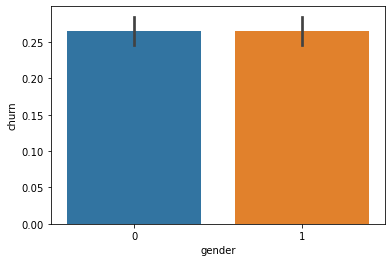

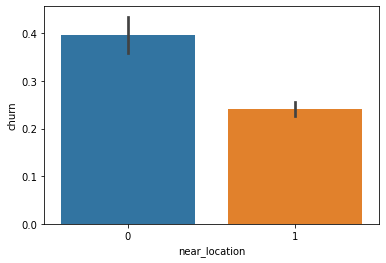

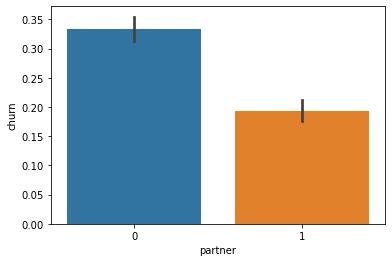

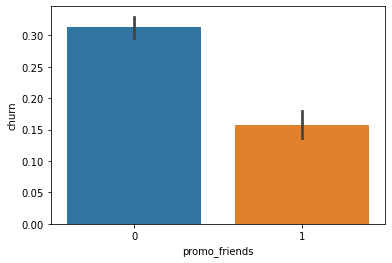

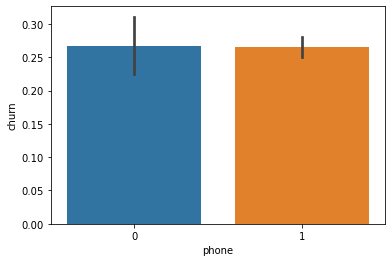

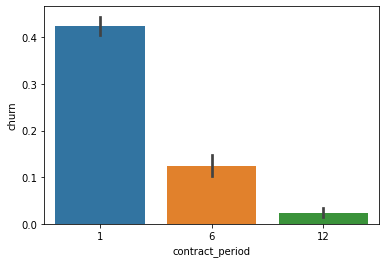

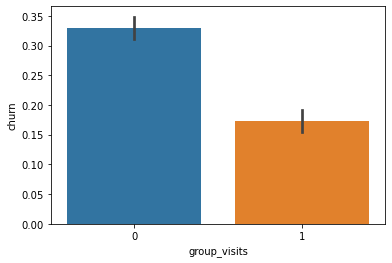

In [11]:

for col in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']:
    sns.barplot(x=data[col], y=data['churn'])
    plt.show()

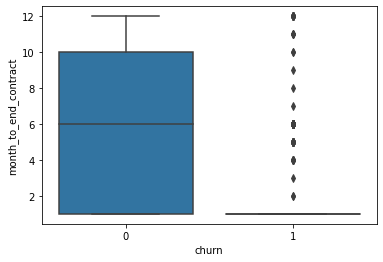

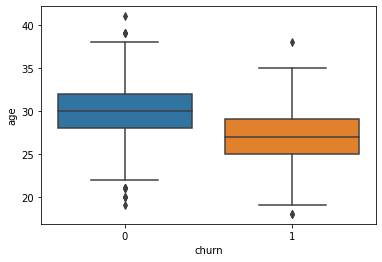

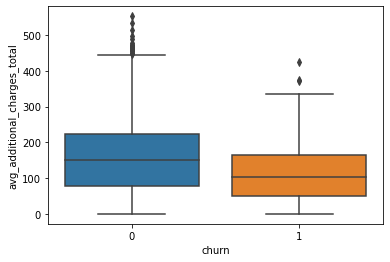

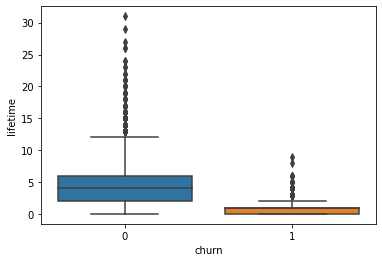

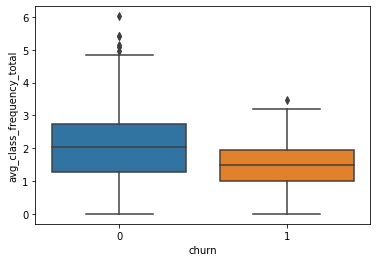

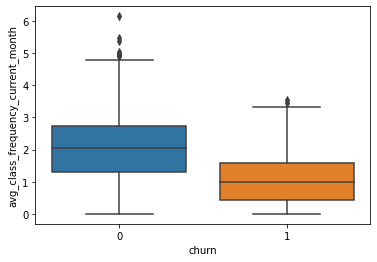

In [12]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    sns.boxplot(x = 'churn', y = data[column], data = data)
    plt.show()

Про ушедших пользователей на данном этапе можно сказать, что большинство живет близко (но среди не попавших в отток еще больше близко проживающих клиентов), пришли не по акции "приведи друга", срок действия абонемента - гораздо меньше, чем у оставшихся, также такие клиенты редко посещают групповые занятия, меньше тратятся на дополнительные услуги.

Построим матрицу корреляций, чтобы посмотреть, есть ли зависимости между признаками.

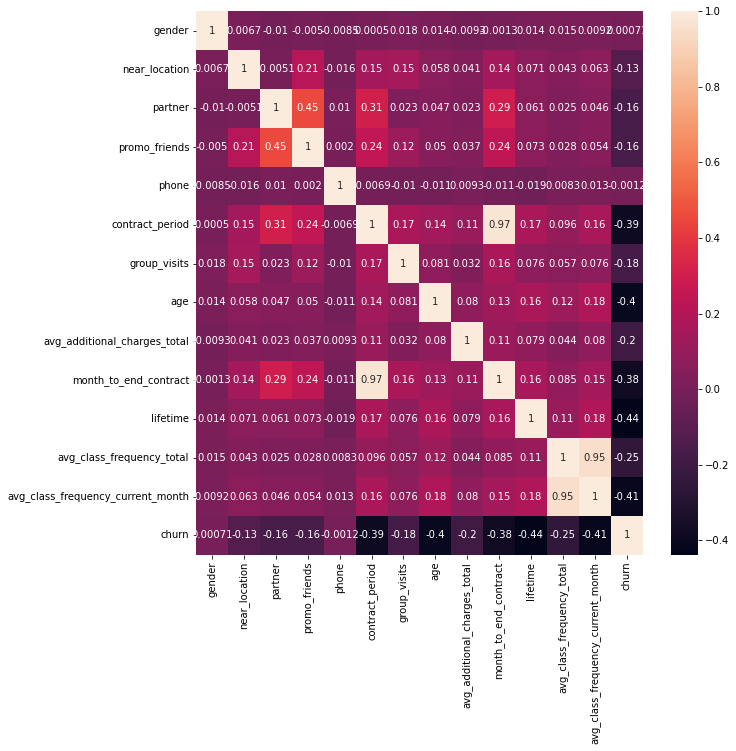

In [13]:
cm = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot = True)
 
plt.show()

Есть мультиколлинеарные признаки:
contract_period - month_to_end_contract
avg_class_frequency_current_month - avg_class_frequency_total.
Удалим из датарейма по одному признаку из пары, чтобы уменьшить вероятность ошибки при обучении модели.

In [14]:
data = data.drop(columns=['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


### Вывод

В ходе предобработки был произведен предварительный анализ принаков у ушедших в отток и оставшихся пользователей.
Были выявлены мультиколлинеарные признаки, в связи с чем два признака пришлось удалить.

## Шаг 3. Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.


In [15]:
X = data.drop('churn', axis = 1)
y = data['churn']

Разобьем данные на обучающую и валидационную выборку функцией train_test_split().

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X.shape

(4000, 11)

In [18]:
y.shape

(4000,)

### Логистическая регрессия

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train_st, y_train)

LogisticRegression()

In [22]:
predictions = model.predict(X_test_st)
probabilities =  model.predict_proba(X_test_st)[:,1]

In [23]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.90
Precision: 0.79
Recall: 0.81


### Случайный лес

In [24]:
rf_model = RandomForestClassifier(random_state = 0) 
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [25]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.78
Recall: 0.77


### Вывод

Что касается Accurancy - доли правильных ответов, то не стоит ориентироваться на эту метрику в нашем случае, т.к. классы неравны: ушедших пользователей в данной выборке в два раза меньше, чем оставшихся.
Precision и recall не зависят от соотношения классов и потому применимы к данной выборке больше. Recall и  точность отнесения к классу (Precision) - выше у Логистической регрессии. Будем считать, что эта модель показала себя лучше.

## Шаг 4. Кластеризация клиентов

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 

In [26]:
scaler = StandardScaler()

In [27]:
X_sc = scaler.fit_transform(data)

In [28]:
linked = linkage(X_sc, method='ward')

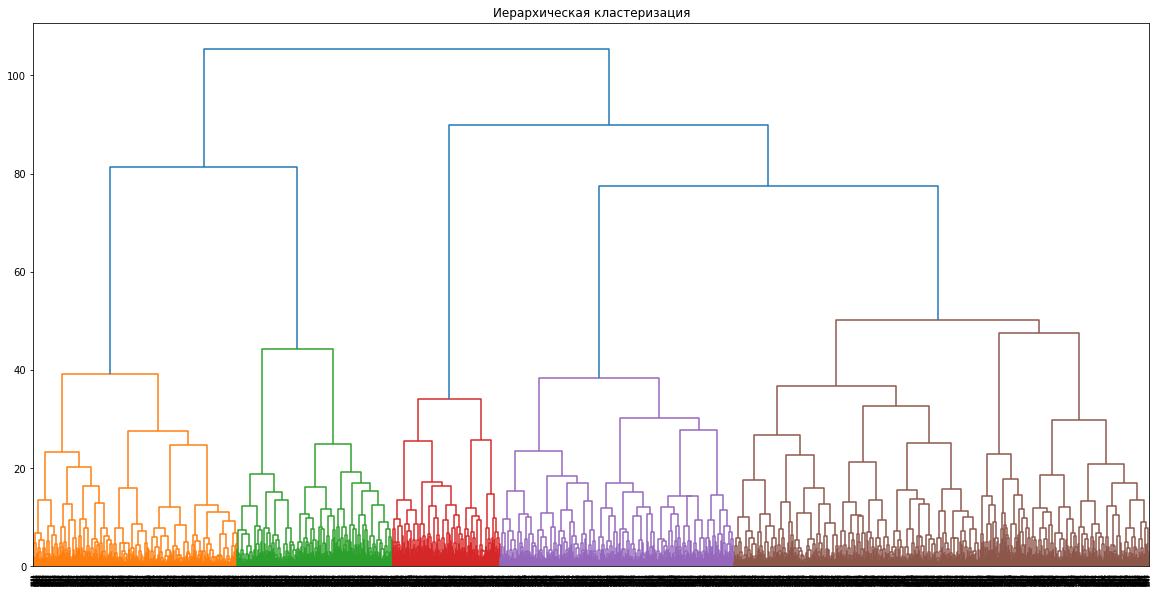

In [29]:
plt.figure(figsize=(20,10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show();

Судя по дендрограмме, можно выделить 5 кластеров.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Количество кластеров - 5.

In [30]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

In [31]:
data['cluster'] = labels

Посмотрим на средние значения признаков для кластеров.

In [32]:
data.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.501661,0.522936,0.503205,0.502627,0.513109
near_location,0.000000,0.999083,0.992521,0.984238,1.000000
partner,0.481728,0.161468,0.916667,0.626970,0.330836
promo_friends,0.071429,0.074312,1.000000,0.000000,0.217228
phone,0.911960,0.902752,0.903846,0.900175,0.900125
contract_period,2.872093,2.068807,7.827991,10.623468,1.682896
group_visits,0.224252,0.450459,0.544872,0.492119,0.289638
age,28.652824,30.055963,29.950855,29.996497,26.922597
avg_additional_charges_total,135.994298,157.510111,159.006129,164.623351,114.095697
lifetime,2.976744,4.833945,4.708333,4.654991,0.965044


In [33]:
cluster_features = data.groupby('cluster').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)

,cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,0,0.50,0.00,0.48,0.07,0.91,2.87,0.22,28.65,135.99,2.98,1.75,0.41
1,1,0.52,1.00,0.16,0.07,0.90,2.07,0.45,30.06,157.51,4.83,2.04,0.00
2,2,0.50,0.99,0.92,1.00,0.90,7.83,0.54,29.95,159.01,4.71,2.01,0.01
3,3,0.50,0.98,0.63,0.00,0.90,10.62,0.49,30.00,164.62,4.65,2.04,0.01
4,4,0.51,1.00,0.33,0.22,0.90,1.68,0.29,26.92,114.10,0.97,1.48,1.00


По полу и возрасту все классы распределены примерно одинаково.

В нулевом кластере преобладают клиенты, которые живут далеко, пришли не по акции, мало посещают групповые занятия.

В первом кластере собрались те, кто живет близко, посещает клуб не по партнерской программе и пришел не по промо-акции. Также у этих клиентов небольшая длительность абонемента.

Второй кластер - клиенты тоже живут близко, но при этом посещают по партнерской компании и пришли по акции, у них достаточно длинный период посещения (действие абонемента).

Третий кластер - клиенты живут близко, пришли не по акции, у них дольше всех действует абонемент. больше всех тратят на дополнительные услуги.

Четвертый кластер - живут  близко, самая короткая длительность абонемента и самый большой отток.




Построим графики распределения признаков для кластеров. Как и в начале проекта, будем использовать как столбчатые графики (для бинарных признаков), так и "ящик с усами".

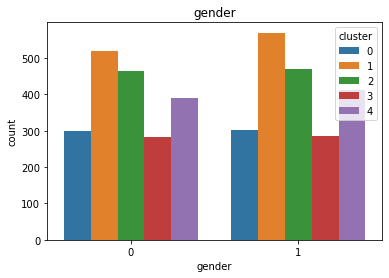

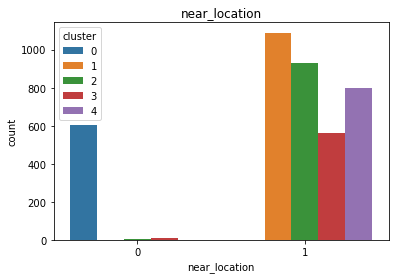

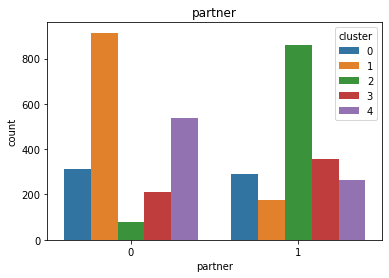

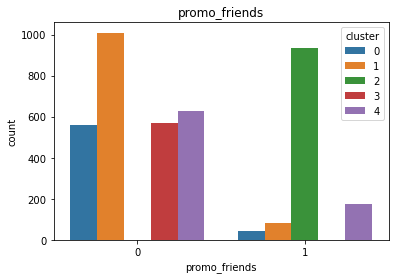

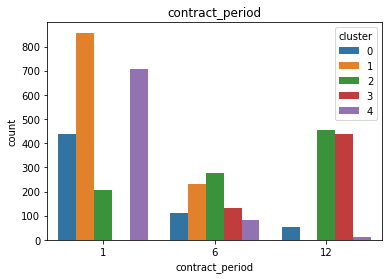

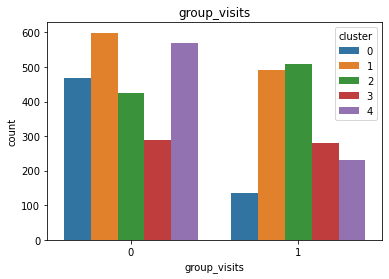

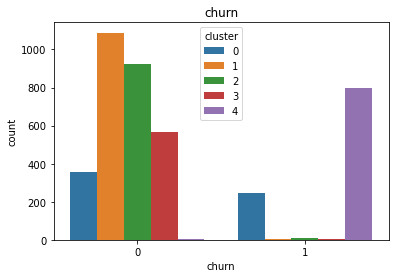

In [34]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'group_visits', 'churn']:
    sns.countplot(x = data[column], hue='cluster', data=data)
    plt.title(column)
    plt.show()

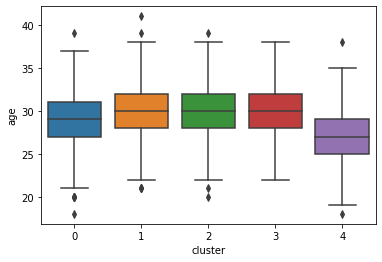

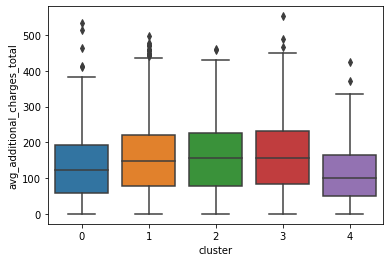

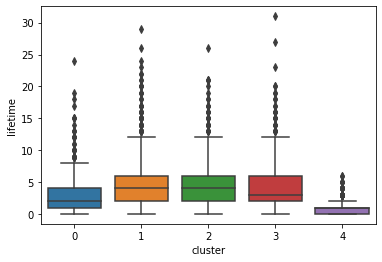

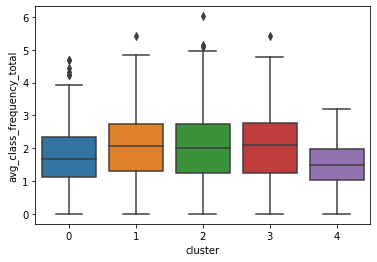

In [35]:
for column in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']:
    sns.boxplot(x = 'cluster', y = data[column], data = data)
    plt.show()

### Вывод
Кластер, в который попало наибольшее количество пользователей с оттоком - четвертый. На него и стоит обратить внимание. Клиенты из этого кластера живут близко, могут ходить по партнерской программе, но чаще - нет. Большинство пришли не по акции, но всё же встречаются и те, кто пришел по акции. Длительность абонемента у таких клиентов - минимальная. Групповые занятия они посещают редко,  меньше всех тратят деньги на дополнительные услуги клуба, посещают зал реже остальных.

Напротив, 1,2 и 3 кластеры включают в себя самых надежных пользователей. Их объединяет близость проживания к клубу, максимальные траты на дополнительные услуги, длительность знакомства с клубом, наиболее частые посещения и присутствие на групповых занятиях.


## Общий вывод

В ходе проведенного исследования удалось выяснить, что попавших в отток пользователей почти в 3 раза меньше, чем оставшихся. 
Исследуемый фитнес-центр посещают клиенты, в том числе близко проживающие, пришедшие по акции, сотрудники компаний-партнеров. У фитнес-центра есть групповые занятия и дополнительные услуги. Все эти факторы помогли проанализировать причины оттока клиентов.

Были построены две модели прогнозирования: логистическая регрессия и случайный лес. Модель "Логистическая регрессия" показала себя чуть лучше.

Далее была произведена кластеризация пользователей. Клиенты были поделены на 5 кластеров.

Проанализировав признаки, по которым клиенты были поделены на классы, можно сделать некоторые выводы и дать рекомендации.

Руководству клуба следует развивать старых клиентов (например, вводить больше дополнительных услуг и разнообразить групповые занятия). Что касается новых клиентов, то отток среди них всё равно будет больше, т.к. такие пользователи только пробуют услуги клуба и смогут определиться в течение непродолжительного времени. Возможно, стоит предложить им скидки на абонементы на длительный срок, на посещение групповых занятий или пробное бесплатное пользование какими-либо дополнительными услугами.